# The Movie Database - Exploratory Analysis

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt

## Load data

In [2]:
credits_df = pd.read_csv('Datasets\\tmdb_5000_credits.csv')
movies_df = pd.read_csv('Datasets\\tmdb_5000_movies.csv')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Merge movies and credit together

In [3]:
movies_df = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id', how='inner', sort=False)
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Clean Data

### Drop redundant columns

In [4]:
del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language',
                'overview', 'production_companies', 'original_title', 'movie_id', 'title_y']
movies_df = movies_df.drop(columns = del_col_list)
movies_df.head(n = 3)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


### Rename column

In [5]:
movies_df = movies_df.rename(columns={'title_x': 'title'})
movies_df.head(n=3)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


### Drop duplicate rows (if any)

In [6]:
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep = 'first')
print(movies_df.shape)

(4803, 14)
(4803, 14)


### Drop NA rows

#### replace all zeros from revenue and budget cols to NA

In [7]:
cols = ['budget', 'revenue']
movies_df[cols] = movies_df[cols].replace(0, np.nan)

#### drop all the rows with NA in the columns mentioned above in the list

In [8]:
movies_df.dropna(subset=cols, inplace=True)
movies_df.shape

(3229, 14)

### Change columns format

#### release_date column to Date format and Extract year

In [9]:
movies_df.release_date = pd.to_datetime(movies_df.release_date)
movies_df['release_year'] = movies_df.release_date.dt.year

movies_df.head(n=3)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,release_year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015


#### budget and revenue columns to integer

In [10]:
change_cols = ['budget', 'revenue']
movies_df[change_cols] = movies_df[change_cols].applymap(np.int64)
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
cast                            object
crew                            object
release_year                     int64
dtype: object

#### Flatten JSON columns

Read JSON from *crew* column in *credit* data frame

In [11]:
crew = credits_df['crew'].apply(json.loads)
crew[0]
i =0

for mv in crew:
    if i < 5:
        for cr in mv:
            if cr['job'] == 'Director':
                print(cr['name'])
        i += 1
    else :
        break; 

James Cameron
Gore Verbinski
Sam Mendes
Christopher Nolan
Andrew Stanton


Read JSON from *cast* column in *credit* data frame

In [12]:
cast = credits_df['cast'].apply(json.loads)
cast[0]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

Write function that flatten JSON columns

In [13]:
def parse_col_json(column, key, filtered = None):
    '''
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    '''
    for index, i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1 = []        
        for j in range(len(i)):
            if filtered is None:
                list1.append(i[j][key])
            else:
                for k in filtered.keys():
                    if i[j][k] == filtered[k]:
                        list1.append(i[j][key])
        movies_df.loc[index, column] = str(list1)

In [14]:
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('cast', 'name')
parse_col_json('crew', 'name', {'job': 'Director'})

movies_df.head(n=3)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",['James Cameron'],2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",['Gore Verbinski'],2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",['Sam Mendes'],2015


## Identify relationship between features

### Define questions

Write function that find min & max in desired columns

In [15]:
def find_min_max_in(col):
    '''
    The function takes in a column and returns the top 5
    and bottom 5 movies dataframe in that column

    Args:
        col: string
            column name
    Return:
        info_df: dataframe
            final 5 movies dataframe
    '''

    top = movies_df[col].idxmax()
    top_df = pd.DataFrame(movies_df.loc[top])

    bottom = movies_df[col].idxmin()
    bottom_df = pd.DataFrame(movies_df.loc[bottom])

    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

#### 1. Which are the 5 most expensive movies?

In [16]:
expensive_movies_df = movies_df.sort_values(by='budget', ascending=False).head()
expensive_movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...",['Rob Marshall'],2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",['Gore Verbinski'],2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",['Joss Whedon'],2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...",['Bryan Singer'],2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",['Andrew Stanton'],2012


#### 2. Which are the 5 most profitable movies?

In [17]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = [
    'budget',
    'profit',
    'revenue',
    'genres',
    'id',
    'popularity',
    'production_countries',
    'release_date',
    'release_year',
    'runtime',
    'spoken_languages',
    'title',
    'cast',
    'crew',
    'vote_average',
    'vote_count'
]
movies_df = movies_df.reindex(columns=cols)
movies_df.sort_values(by='budget', ascending=False).head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,crew,vote_average,vote_count
17,380000000,665713802,1045713802,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,2011,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...",['Rob Marshall'],6.4,4948
1,300000000,661000000,961000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",['Gore Verbinski'],6.9,4500
7,280000000,1125403694,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",['Joss Whedon'],7.3,6767
10,270000000,121081192,391081192,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,2006,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...",['Bryan Singer'],5.4,1400
4,260000000,24139100,284139100,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,2012,132.0,['English'],John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",['Andrew Stanton'],6.1,2124


#### 3. Which are the 5 most talked about?

In [18]:
popular_movies_df = movies_df.sort_values(by='popularity', ascending=False).head()
popular_movies_df

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,crew,vote_average,vote_count
546,74000000,1082730962,1156730962,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,2015,91.0,['English'],Minions,"['Sandra Bullock', 'Jon Hamm', 'Michael Keaton...","['Kyle Balda', 'Pierre Coffin']",6.4,4571
95,165000000,510120017,675120017,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,2014,169.0,['English'],Interstellar,"['Matthew McConaughey', 'Jessica Chastain', 'A...",['Christopher Nolan'],8.1,10867
788,58000000,725112979,783112979,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,2016,108.0,['English'],Deadpool,"['Ryan Reynolds', 'Morena Baccarin', 'Ed Skrei...",['Tim Miller'],7.4,10995
94,170000000,603328629,773328629,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,2014,121.0,['English'],Guardians of the Galaxy,"['Chris Pratt', 'Zoe Saldana', 'Dave Bautista'...",['James Gunn'],7.9,9742
127,150000000,228858340,378858340,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,2015,120.0,['English'],Mad Max: Fury Road,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",['George Miller'],7.2,9427


#### 4. What is the average runtime of movies? and comparison between the extremes

Average runtime of movies

In [19]:
movies_df.runtime.mean()

110.72437287085785

Comparison

In [20]:
find_min_max_in('runtime')

,2384,3626
budget,18000000,5000000
profit,-17128721,-925977
revenue,871279,4074023
genres,"['Crime', 'Drama', 'Thriller', 'History']",['Documentary']
id,43434,78394
popularity,1.138383,4.498368
production_countries,"['France', 'Germany']","['France', 'United Kingdom']"
release_date,2010-05-19 00:00:00,2010-05-14 00:00:00
release_year,2010,2010
runtime,338.0,41.0


##### 5. Which are the movies rated above 7?

In [21]:
movies_df[movies_df.vote_average >= 7.0]

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,crew,vote_average,vote_count
0,237000000,2550965087,2787965087,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",['James Cameron'],7.2,11800
3,250000000,834939099,1084939099,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,2012,165.0,['English'],The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",['Christopher Nolan'],7.6,9106
6,260000000,331794936,591794936,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,2010,100.0,['English'],Tangled,"['Zachary Levi', 'Mandy Moore', 'Donna Murphy'...","['Byron Howard', 'Nathan Greno']",7.4,3330
7,280000000,1125403694,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",['Joss Whedon'],7.3,6767
8,250000000,683959197,933959197,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,2009,153.0,['English'],Harry Potter and the Half-Blood Prince,"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...",['David Yates'],7.4,5293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,6546368,6706368,"['Documentary', 'History']",1779,3.284903,['United States of America'],1989-09-01,1989,91.0,['English'],Roger & Me,"['Michael Moore', 'Roger B. Smith', 'Rhonda Br...",['Michael Moore'],7.4,90
4724,10000,6990000,7000000,"['Drama', 'Fantasy', 'Horror', 'Science Fiction']",985,20.399578,['United States of America'],1977-03-19,1977,89.0,['English'],Eraserhead,"['Jack Nance', 'Charlotte Stewart', 'Allen Jos...",['David Lynch'],7.5,485
4738,60000,3161152,3221152,"['Mystery', 'Drama', 'Thriller']",473,27.788067,['United States of America'],1998-07-10,1998,84.0,['English'],Pi,"['Sean Gullette', 'Mark Margolis', 'Ben Shenkm...",['Darren Aronofsky'],7.1,586
4773,27000,3124130,3151130,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,1994,92.0,['English'],Clerks,"[""Brian O'Halloran"", 'Jeff Anderson', 'Jason M...",['Kevin Smith'],7.4,755


#### 6. Which year did we have the most profitable movies?

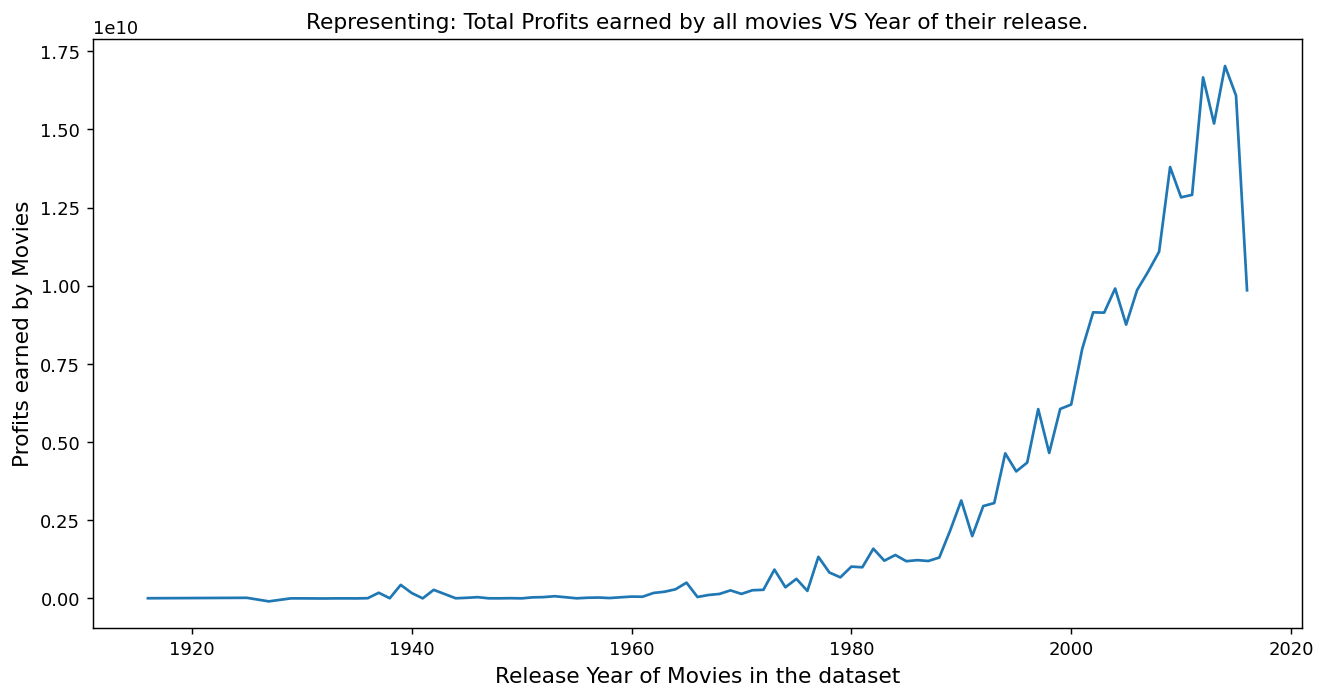

In [22]:
profits_year = movies_df.groupby('release_year')['profit'].sum()

# figure size (width, height)
plt.figure(figsize=(12, 6), dpi = 130)

# label on x-axis
plt.xlabel('Release Year of Movies in the dataset', fontsize = 12)
# label on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
# title of the line plot
plt.title('Representing: Total Profits earned by all movies VS Year of their release.')

# plot the graph
plt.plot(profits_year)

# display the line plot
plt.show()

In [23]:
profits_year.idxmax()

2014

### More Question

#### 1. What is the most successful genre?

In [24]:
# formatting the data in the genre column
movies_df['genres'] = movies_df['genres'].str.strip('[]').str.replace("'", '').str.split(', ')
movies_df.head(n=3)

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,crew,vote_average,vote_count
0,237000000,2550965087,2787965087,"[Action, Adventure, Fantasy, Science Fiction]",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",['James Cameron'],7.2,11800
1,300000000,661000000,961000000,"[Adventure, Fantasy, Action]",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",['Gore Verbinski'],6.9,4500
2,245000000,635674609,880674609,"[Action, Adventure, Crime]",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,2015,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",['Sam Mendes'],6.3,4466


In [25]:
profit_data = movies_df[movies_df.profit >= 50000000]

# reindex new data
profit_data.index = range(len(profit_data))

# index start from 1
profit_data.index = profit_data.index + 1

<AxesSubplot:>

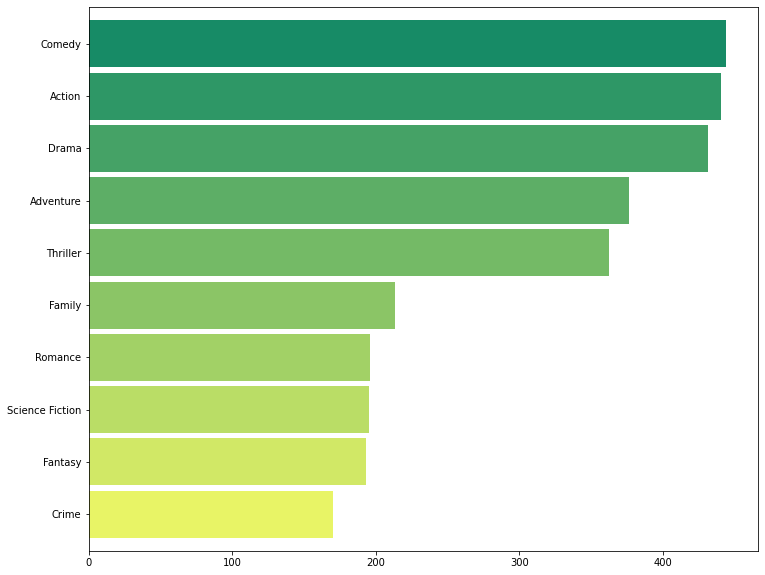

In [26]:
plt.subplots(figsize=(12,10))
list1=[]

for i in profit_data['genres']:
    list1.extend(i)

genre_count_series = pd.Series(list1).value_counts()[:10].sort_values(ascending=True)

ax = genre_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r', 10)
)

ax

#### 2. Who is the most frequent cast in movies? 

In [27]:
movies_df['cast'] = movies_df['cast'].str.strip('[]').str.replace("'",'').str.split(', ')
movies_df.head(n=3)

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,crew,vote_average,vote_count
0,237000000,2550965087,2787965087,"[Action, Adventure, Fantasy, Science Fiction]",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",['James Cameron'],7.2,11800
1,300000000,661000000,961000000,"[Adventure, Fantasy, Action]",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",['Gore Verbinski'],6.9,4500
2,245000000,635674609,880674609,"[Action, Adventure, Crime]",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,2015,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",['Sam Mendes'],6.3,4466


In [28]:
profit_data = movies_df[movies_df.profit >= 50000000]

# reindex new data
profit_data.index = range(len(profit_data))

# index start from 1
profit_data.index = profit_data.index + 1

<AxesSubplot:title={'center':'Top Actors'}>

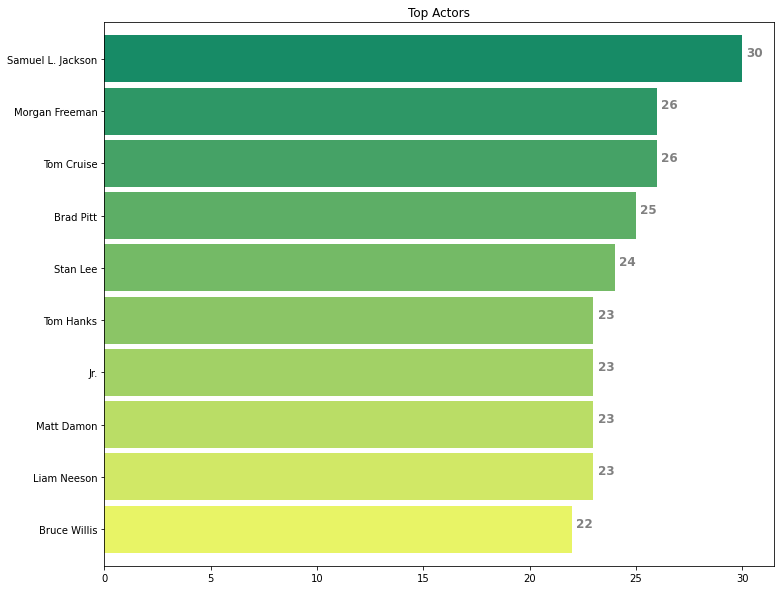

In [29]:
plt.subplots(figsize=(12,10))
list1=[]

for i in profit_data['cast']:
    list1.extend(i)

genre_count_series = pd.Series(list1).value_counts()[:10].sort_values(ascending=True)

ax = genre_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r', 10)
)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=12, fontweight='bold',
             color='grey')

ax.set_title('Top Actors')

ax

#### 3. Average runtime of profitable movie?

In [30]:
profit_data.runtime.mean()

114.37928286852589

#### 4. Average revenue of profitable movie?

In [31]:
profit_data.revenue.mean()

262022090.17768925

#### 5. Average budget of profitable movie?

In [32]:
profit_data.budget.mean()

63032056.92111554

## Conclusion

For a Movie to be profitable for a producer: <br>
- Average Budget must be around **63 millon dollar**.
- Average duration of the movie must be **114 minutes**.
- Any one of these should be in the cast: *Samuel Jackson, Robert De Neiro, Morgan Freeman, Bruce Willis*.
- Genre must be: *Action, Adventure, Thriller, Comedy, Drama*. <br>

By doing all this the movie might be one of the hits and hence can earn an average revenue of around **262 million dollar**.